<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04



## Problema 01

<img src="https://drive.google.com/uc?export=view&id=1LkStfZqwS8AOm_xja6KDWWQMQV2ijrDu" width = "300" align="center"/>

EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(5,3)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_04/data/company_sales_data.csv")
df


,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

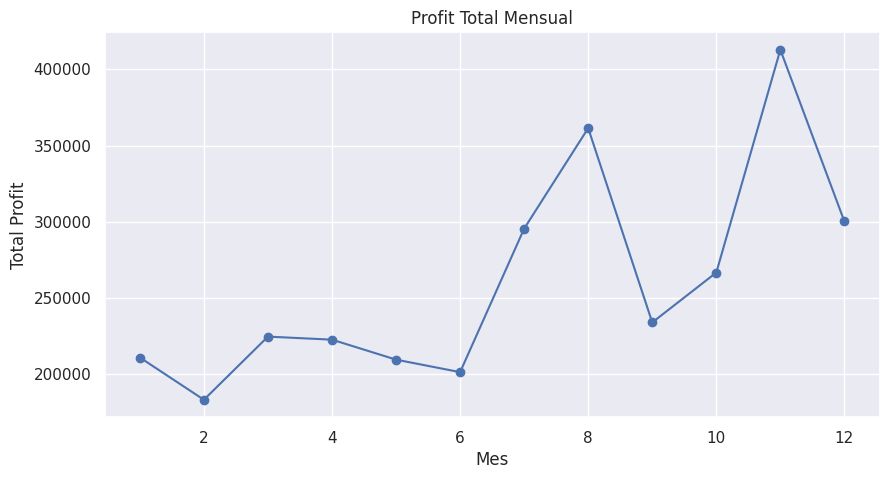

In [3]:
fig = plt.figure(figsize=(10, 5))

plt.plot(df["month_number"].values,df["total_profit"].values,marker='o')
plt.title('Profit Total Mensual')
plt.xlabel('Mes')
plt.ylabel('Total Profit')

#el profe aclaro en la clase que queria lineal y dispersion en un solo grafico.
plt.show()

#Este grafico sirve para ver como se comporta las ganancias totales
#Notamos que van 'subiendo' a medida que transcurren los meses

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

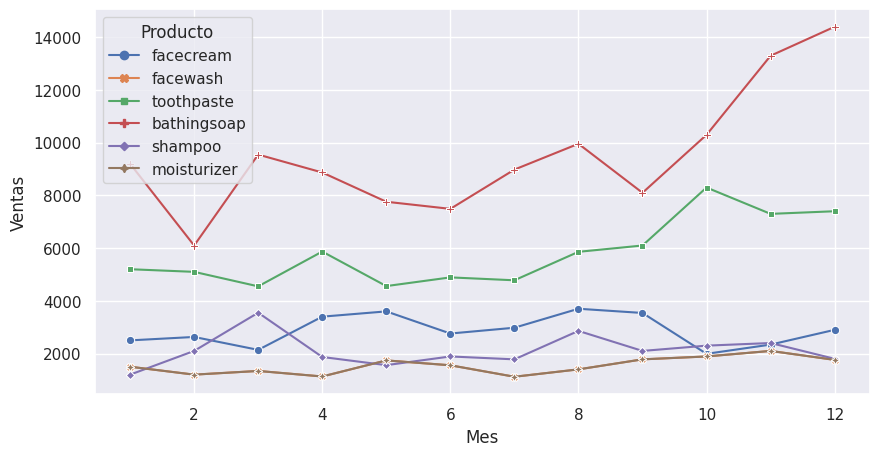

In [4]:
df_ventaproductos=df.melt('month_number',var_name='Producto', value_name='Ventas')
df_ventaproductos = df_ventaproductos.loc[(df_ventaproductos['Producto'] != 'total_profit')& (df_ventaproductos['Producto'] != 'total_units')]
plt.figure(figsize=(10, 5))
palette = sns.color_palette("hls", 6)

sns.lineplot(
    x='month_number',
    y='Ventas',
    hue='Producto',
    data=df_ventaproductos,
    markers=True,
    style='Producto',
    dashes=False

).set(xlabel='Mes')
plt.show()

#Podria Haber intentado elegir mejor los colores.
#Notar que este grafico ya nos dice que producto vende más a traves del tiempo
#Podemos ver que bathingsoap baja drasticamente en febrero (mes 2)
#cabe destacar que facewash y moisturizer son identicas y por esto la primera no se ve

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

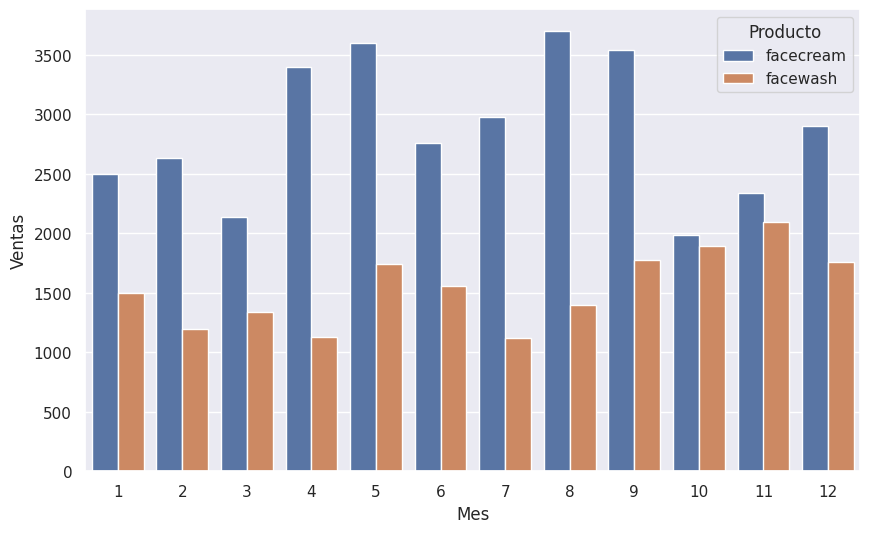

In [5]:
df_facecream_facewash= df_ventaproductos.loc[(df_ventaproductos['Producto']=='facecream' )|(df_ventaproductos['Producto']=='facewash')]
plt.figure(figsize=(10,6))
sns.barplot(x='month_number',y='Ventas',data=df_facecream_facewash,hue='Producto').set(xlabel='Mes')
plt.show()
#Con este tipo de graficos, podemos comparar 2 productos de mejor manera
#esto debido a los posibles ordenes de magnitud de diferencia

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

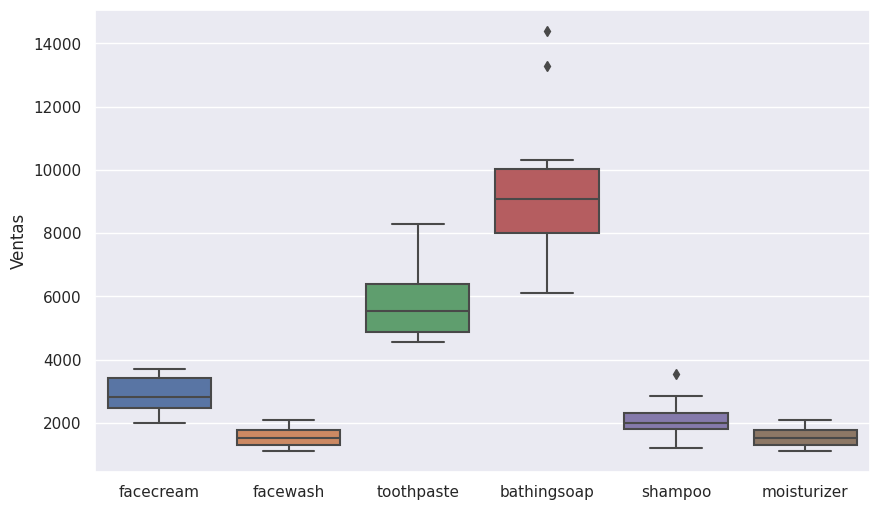

In [6]:
plt.figure(figsize=(10,6))
columnas=df.columns
columnas=columnas.drop('month_number')
columnas=columnas.drop('total_profit')
columnas=columnas.drop('total_units')
sns.boxplot(df[columnas]).set(ylabel='Ventas')
plt.show()

# Este grafico no me gusta mucho
# Podria decirnos si es que hay datos anomalos, pero en este caso son tan pocos datos que no es factible 'eliminarlos'


5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

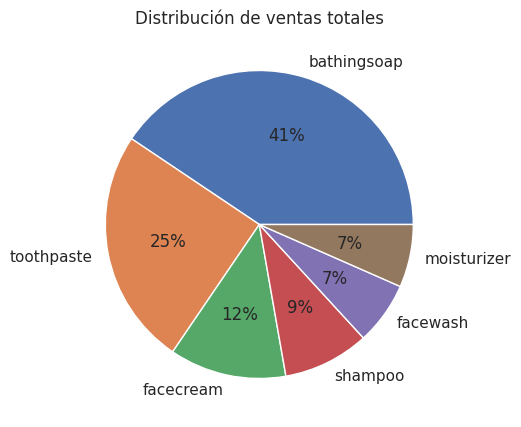

In [7]:
plt.figure(figsize=(5,5))
grupo = df_ventaproductos.groupby('Producto')
datos = grupo['Ventas'].sum()
datos = datos.sort_values(ascending=False)
plt.pie(datos,labels=datos.index, autopct='%.0f%%')
plt.title('Distribución de ventas totales')
plt.show()

# Este grafico sirve para ver los porcentajes que aporta cada producto a la compañia. Sin embargo,
# como se vio en clases, las Areas pueden engañarnos, haciendo ver algunos productos como si aportaran más de lo que realmente hacen.
# sí quisieramos mas 'precisión' deberiamos de elegir un grafico de barras, aunque en este caso si se cumple el objetivo.